In [32]:
#importing libraries
import datetime
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd


from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.datasets import make_regression
from sklearn.model_selection import GridSearchCV

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_log_error
from xgboost import XGBRegressor


sns.set()
sns.set_style('darkgrid')

#warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [33]:
#reading files
train = pd.read_csv('train.csv', parse_dates=True)
test = pd.read_csv('test.csv', parse_dates=True)

In [34]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [35]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [36]:
train.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


<AxesSubplot:xlabel='count'>

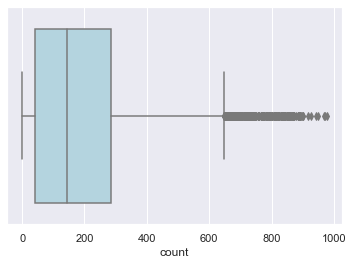

In [37]:
sns.boxplot(x='count',data=train,color='lightblue')

<function matplotlib.pyplot.show(close=None, block=None)>

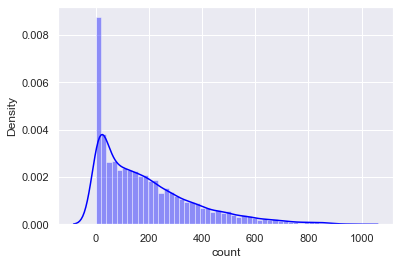

In [38]:
sns.set_style('darkgrid')
sns.distplot(train['count'],bins=50,color='blue')
plt.show

['temp', 'atemp', 'humidity', 'windspeed']


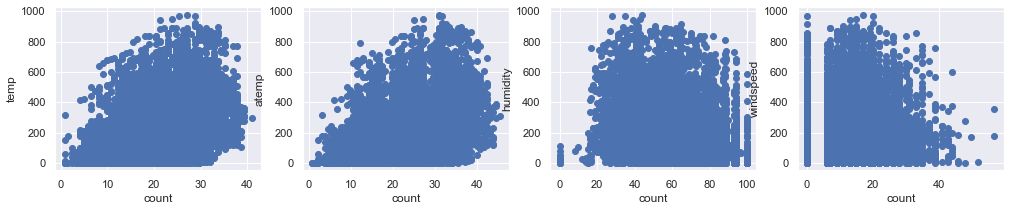

In [39]:
fields=[f for f in train]
fields=fields[5:-3]
print(fields)

fig=plt.figure(figsize=(17,3))

for i,f in enumerate(fields):
    px=fig.add_subplot(1,4,i+1)
    px.scatter(train[f],train['count'])
    px.set_ylabel(f)
    px.set_xlabel('count')
plt.show()

[Text(0.5, 0, 'weather'), Text(0, 0.5, 'count')]

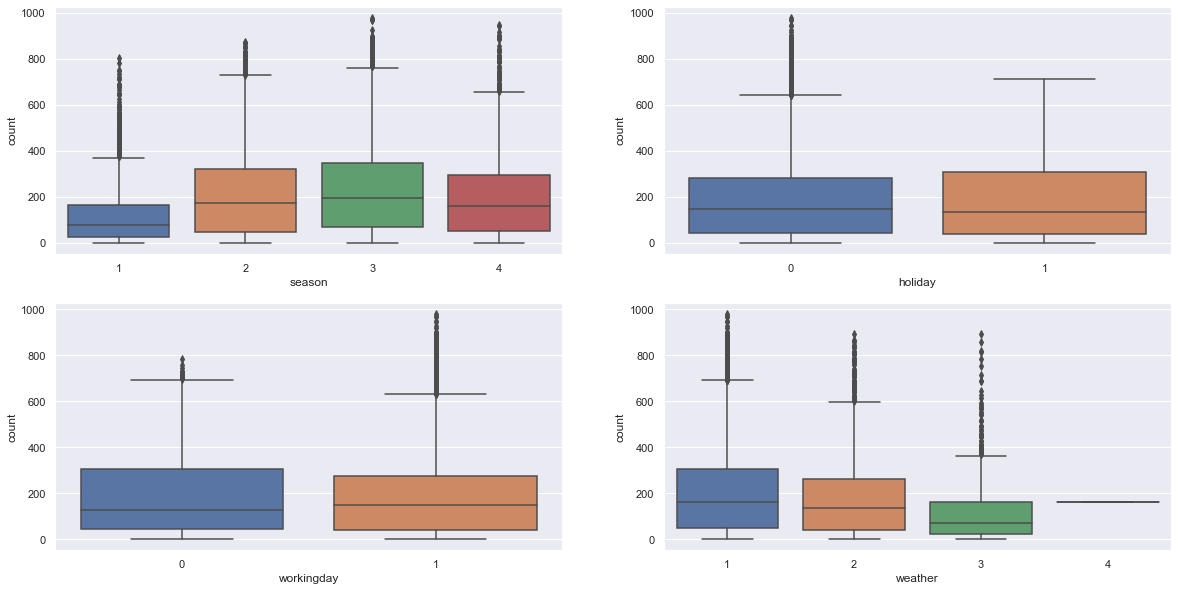

In [40]:
fig,axes=plt.subplots(nrows=2,ncols=2)
fig.set_size_inches(20,10)

sns.boxplot(data=train,y='count',x='season',ax=axes[0][0])
sns.boxplot(data=train,y='count',x='holiday',ax=axes[0][1])
sns.boxplot(data=train,y='count',x='workingday',ax=axes[1][0])
sns.boxplot(data=train,y='count',x='weather',ax=axes[1][1])

axes[0][0].set(xlabel='season',ylabel='count')
axes[0][1].set(xlabel='holiday',ylabel='count')
axes[1][0].set(xlabel='workingday',ylabel='count')
axes[1][1].set(xlabel='weather',ylabel='count')

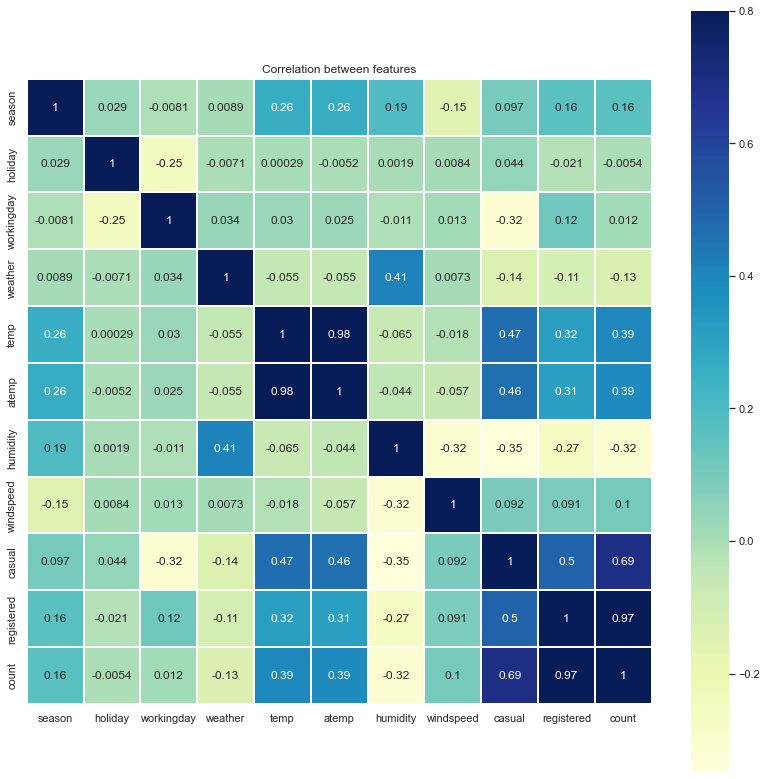

In [41]:
corr=train.corr()
plt.figure(figsize=(14, 14))

df_features=train[['season','holiday','workingday','weather','temp','atemp','humidity','windspeed','casual','registered','count']]

df_features=df_features.corr(method='pearson') 

sns.heatmap(corr, vmax=.8, linewidths=0.01,
            square=True,annot=True,cmap='YlGnBu',linecolor="white")
plt.title('Correlation between features');

<Figure size 432x288 with 0 Axes>

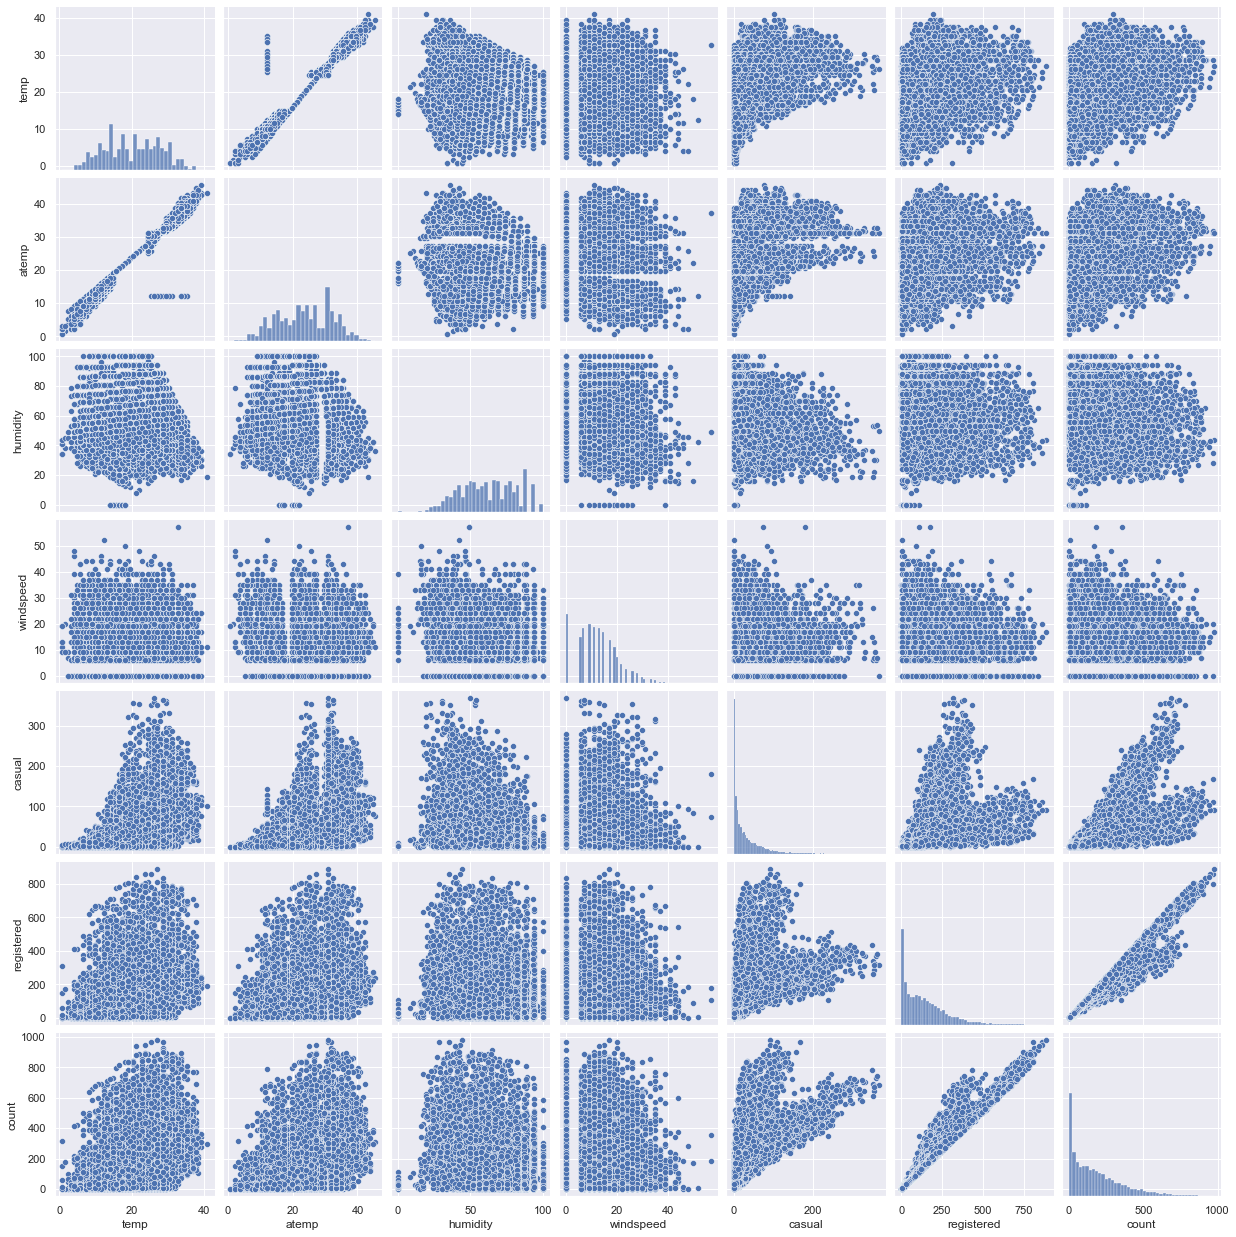

In [42]:
numerical_rep = train[["temp", "atemp", "humidity", "windspeed", "casual", "registered", "count"]]
plt.figure()
sns.pairplot(numerical_rep)
plt.show()

In [43]:
train['datetime'] = pd.to_datetime(train['datetime'])
test['datetime']= pd.to_datetime(test['datetime'])
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [44]:
def split_datetime(df):
    df['year'] = df['datetime'].dt.year
    df['month'] = df['datetime'].dt.month
    df['day'] = df['datetime'].dt.day
    df['weekday'] = df['datetime'].dt.weekday
    df['hour'] = df['datetime'].dt.hour
    df = df.drop(['datetime'],axis=1)
    
    return df

In [45]:
train=split_datetime(train)
test=split_datetime(test)
train = train.drop(['casual','registered'],axis=1)
train.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count,year,month,day,weekday,hour
0,1,0,0,1,9.84,14.395,81,0.0,16,2011,1,1,5,0
1,1,0,0,1,9.02,13.635,80,0.0,40,2011,1,1,5,1
2,1,0,0,1,9.02,13.635,80,0.0,32,2011,1,1,5,2
3,1,0,0,1,9.84,14.395,75,0.0,13,2011,1,1,5,3
4,1,0,0,1,9.84,14.395,75,0.0,1,2011,1,1,5,4


<AxesSubplot:xlabel='hour', ylabel='count'>

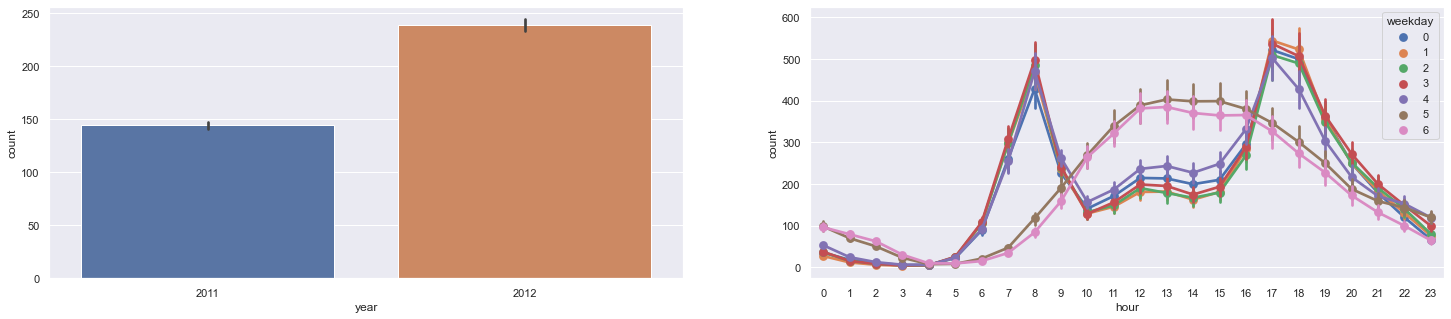

In [46]:
fig,axes=plt.subplots(nrows=1,ncols=2)
fig.set_size_inches(25,5)
sns.barplot(data=train,x='year',y='count',ax=axes[0])
sns.pointplot(data=train,x='hour',y='count',ax=axes[1],hue='weekday')

<AxesSubplot:xlabel='month', ylabel='count'>

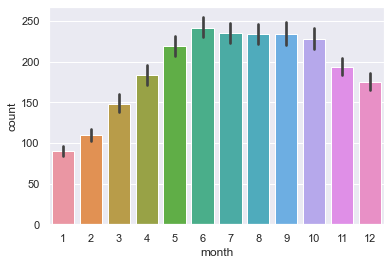

In [47]:
sns.barplot(data=train,x='month',y='count')

<AxesSubplot:xlabel='count', ylabel='Density'>

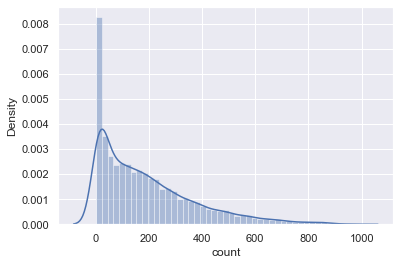

In [48]:
sns.distplot(train['count'])

In [49]:
train['count']=np.log1p(train['count'])

<AxesSubplot:xlabel='count', ylabel='Density'>

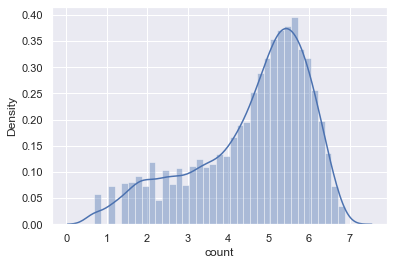

In [50]:
sns.distplot(train['count'])

In [51]:
train=train[np.abs(train['count'])-train['count'].mean() <=(3*train['count'].std())]

<AxesSubplot:xlabel='count'>

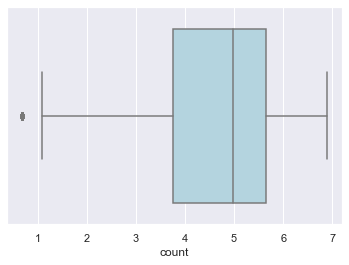

In [52]:
sns.boxplot(x='count', data=train,color='lightblue')

In [53]:
drop_idx=train[(train['temp']>10) & (train['temp']<20)].index
train=train.drop(drop_idx)

In [54]:
train.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count,year,month,day,weekday,hour
0,1,0,0,1,9.84,14.395,81,0.0,2.833213,2011,1,1,5,0
1,1,0,0,1,9.02,13.635,80,0.0,3.713572,2011,1,1,5,1
2,1,0,0,1,9.02,13.635,80,0.0,3.496508,2011,1,1,5,2
3,1,0,0,1,9.84,14.395,75,0.0,2.639057,2011,1,1,5,3
4,1,0,0,1,9.84,14.395,75,0.0,0.693147,2011,1,1,5,4


In [55]:
def scaling(df):
    scaler=MinMaxScaler()
    num_cols=['temp','humidity','windspeed']
    df[num_cols]=scaler.fit_transform(df[num_cols])
    return df

In [56]:
train=scaling(train)
test=scaling(test)

In [57]:
train.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count,year,month,day,weekday,hour
0,1,0,0,1,0.224490,14.395,0.793478,0.0,2.833213,2011,1,1,5,0
1,1,0,0,1,0.204082,13.635,0.782609,0.0,3.713572,2011,1,1,5,1
2,1,0,0,1,0.204082,13.635,0.782609,0.0,3.496508,2011,1,1,5,2
3,1,0,0,1,0.224490,14.395,0.728261,0.0,2.639057,2011,1,1,5,3
4,1,0,0,1,0.224490,14.395,0.728261,0.0,0.693147,2011,1,1,5,4


In [58]:
corr_df = train.corr().abs().unstack().sort_values(ascending=False).reset_index()
corr_df.rename(columns={"level_0": "Feature 1", "level_1": "Feature 2", 0: 'Corr Coeff'}, inplace=True)
corr_df[(corr_df['Feature 1']=='count') & (corr_df['Feature 2']!='count') ]

,Feature 1,Feature 2,Corr Coeff
21,count,hour,0.589196
31,count,temp,0.450296
32,count,atemp,0.445676
36,count,humidity,0.359030
48,count,month,0.196863
51,count,season,0.196259
52,count,year,0.192785
62,count,windspeed,0.142970
73,count,weather,0.104700
89,count,weekday,0.046282


In [59]:
X=train.drop(['count'],axis=1)
y=train['count']
X_train, X_test,y_train,y_test=train_test_split(train.drop(['count'],axis=1),train['count'],test_size=0.3)

In [60]:
def rmsle(y,pred):
    log_y=np.log1p(y)
    log_pred=np.log1p(pred)
    squared_error=(log_y-log_pred)**2
    rmsle=np.sqrt(np.mean(squared_error))
    return rmsle

In [61]:
def evaluate(reg_clf,params=None):
    reg=reg_clf()
    if params:
        reg=GridSearchCV(reg,param_grid=params,refit=True)
    reg.fit(X_train,y_train)
    pred=reg.predict(X_test)
    
    y_test_exp=np.expm1(y_test)
    pred_exp=np.expm1(pred)
    print('\n',reg_clf)
    if params:
        print(reg.best_params_)
        reg=reg.best_estimator_
    print(rmsle(y_test,pred_exp))
    return reg,pred_exp

In [62]:
lr_reg,pred_lr=evaluate(LinearRegression)
rg_reg,pred_rg=evaluate(Ridge)
ls_reg,pred_ls=evaluate(Lasso)
rf_reg,pred_rf=evaluate(RandomForestRegressor)
gb_reg,pred_gb=evaluate(GradientBoostingRegressor)
xg_reg,pred_xg=evaluate(XGBRegressor)

params={'n_estimators':[100*i for i in range(1,6)]}

xg_reg,pred_xg=evaluate(XGBRegressor,params)


 <class 'sklearn.linear_model._base.LinearRegression'>
3.1582407361090366

 <class 'sklearn.linear_model._ridge.Ridge'>
3.158010905366732

 <class 'sklearn.linear_model._coordinate_descent.Lasso'>
3.09021712248396

 <class 'sklearn.ensemble._forest.RandomForestRegressor'>
3.2248346680034286

 <class 'sklearn.ensemble._gb.GradientBoostingRegressor'>
3.208996875075996

 <class 'xgboost.sklearn.XGBRegressor'>
3.228077343396143

 <class 'xgboost.sklearn.XGBRegressor'>
{'n_estimators': 100}
3.228077343396143


In [63]:
def feature_importances(reg):
    plt.figure(figsize=(20,10))
    print(type(reg))
    df=pd.DataFrame(sorted(zip(X_train.columns,reg.feature_importances_)),columns=['features','values'])
    sns.barplot(x='values',y='features',data=df.sort_values(by='values'),ascending=True)
    plt.show()

In [64]:
submission=pd.read_csv('/Users/mac/Desktop/bikeWK3/sampleSubmission.csv')
submission.head()

,datetime,count
0,2011-01-20 00:00:00,0
1,2011-01-20 01:00:00,0
2,2011-01-20 02:00:00,0
3,2011-01-20 03:00:00,0
4,2011-01-20 04:00:00,0


In [65]:
test.shape

(6493, 13)

In [66]:
submission.shape

(6493, 2)

In [67]:
pred=xg_reg.predict(test)
pred_exp=np.expm1(pred)
print(pred_exp)

[ 22.36862     6.177017    4.0426173 ... 164.73723    95.63094
  61.806976 ]


In [68]:
submission.loc[:,'count']=pred_exp
submission

,datetime,count
0,2011-01-20 00:00:00,22.368620
1,2011-01-20 01:00:00,6.177017
2,2011-01-20 02:00:00,4.042617
3,2011-01-20 03:00:00,3.320211
4,2011-01-20 04:00:00,2.502427
...,...,...
6488,2012-12-31 19:00:00,293.614594
6489,2012-12-31 20:00:00,251.127853
6490,2012-12-31 21:00:00,164.737228
6491,2012-12-31 22:00:00,95.630943


In [69]:
submission.to_csv('submissionfinal.csv',index=False)